<a href="https://colab.research.google.com/github/VittorioBartolomeoSecondin/DVIS-CAValli_Team/blob/main/Assignment1%20-%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and pre-processing

## Importing libraries and connecting to Google Drive

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv
import re

from google.colab import drive
drive.mount('/content/drive') # turned out to be a good workaround to load a huge amount of data and keep it available

Mounted at /content/drive


## Reading the data

Each dataset file contains several items associated with cities that do not correspond to the main one, that is the one giving the name to the .csv file, but they are in practice <ins>small towns supposed to be clustering in a restricted neighbourhood enclosing the main city</ins>.

Since these small towns have very few occurrences of trees, **we decide to take into account only the main city** (denoted by the attribute *greater_metro* in the dataset) to derive some aggregated information.

In [2]:
all_files = glob.glob("/content/drive/MyDrive/tree_dataset/*.csv") # all .csv files
all_files.sort() # imposing a given order
print(all_files)

['/content/drive/MyDrive/tree_dataset/Albuquerque_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Anaheim_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Arlington_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Atlanta_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/AuroraCO_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Austin_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Baltimore_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Boston_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Buffalo_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/CapeCoral_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/ColoradoSprings_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Columbus_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Dallas_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Denver_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_da

In [3]:
list_of_df = []

for filename in all_files:
    df = pd.read_csv(filename, low_memory=False)
    if list_of_df:
        df = df.reindex(columns=list_of_df[0].columns)
    list_of_df.append(df)

tree_dataset = pd.concat(list_of_df, axis=0, ignore_index=True)

## Analysing dataset size and null values

In [4]:
print(tree_dataset.shape) # N=5660237, 28 columns expected

(5660237, 28)


The total amount of trees is **5,660,237** (as reported in the introduction on Kaggle) and not 5,132,890 as specified in *README_Dryad.txt* file.


In [5]:
tree_dataset.isnull().sum()

most_recent_observation             2127842
most_recent_observation_type        3198777
common_name                          892476
scientific_name                      529297
city                                    505
state                                    31
longitude_coordinate                 751709
latitude_coordinate                  751578
address                             1254389
condition                           3038500
height_M                            4951094
native                                    0
height_binned_M                     4996887
diameter_breast_height_binned_CM    1574755
greater_metro                             0
city_ID                             2017770
tree_ID                             5660237
planted_date                        5213598
retired_date                        5658047
location_type                       3469760
zipcode                             4768676
neighborhood                        5132935
location_name                   

We decide to retain **only those columns whose number of null values is lower than 88% of the total amount of observations**.

In [6]:
filtered_columns = tree_dataset.columns[tree_dataset.isnull().sum() < 0.88 * tree_dataset.shape[0]]
tree_dataset = tree_dataset[filtered_columns]

### Inspecting variables: *state*

In [7]:
tree_dataset[tree_dataset['state'].isna()]

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,height_M,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,zipcode,diameter_breast_height_CM
746,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
747,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
751,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1202,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1863,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1864,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1865,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1866,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1867,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1868,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN


Only 31 records, that are crammed in the *Albuquerque_Final_2022-06-18.csv* file, **have a null value in the column named *state***. In this case the state can be easily inferred and therefore specified in each of these rows in place of such a null value.

In [8]:
tree_dataset['state'] = tree_dataset['state'].fillna("New Mexico")

### Inspecting variables: *location_type*

In [9]:
tree_dataset['location_type'].value_counts()

no_info              1160294
built_environment     604270
green_space           425901
<null>                    12
Name: location_type, dtype: int64

We decided to replace all occurrences of null values (in any format) stored by the column named *location_type* with the value *no_info*.

In [10]:
tree_dataset['location_type'] = tree_dataset['location_type'].fillna("no_info")
tree_dataset['location_type'] = tree_dataset['location_type'].replace('<null>', "no_info")
tree_dataset['location_type'].value_counts()

no_info              4630066
built_environment     604270
green_space           425901
Name: location_type, dtype: int64

### Inspecting variables: *scientific_name* and *common_name*

In [11]:
tree_dataset['scientific_name'].value_counts().to_frame()

,scientific_name
Platanus acerifolia,217762
Lagerstroemia indica,207061
Acer platanoides,198951
Gleditsia triacanthos,167242
Pyrus calleryana,159981
...,...
Persea palustris,1
Acer henryi,1
Maackia chinensis,1
Castanospermum australe,1


In [12]:
tree_dataset['common_name'].value_counts().to_frame()

,common_name
Norway maple,142560
London planetree,122493
Red maple,121825
Crape myrtle,121775
ok to plant vacant,113631
...,...
Cotton candy magnolia,1
Summer chocolate mimosa,1
Eastern whitebud,1
Coralcole crabapple,1


Some annotations in these fields are very inconsistent (we also checked the original .csv files for such inconsistencies), so we decided to further explore the two variables.

In [13]:
print('Scientific name null:', tree_dataset['scientific_name'].isnull().sum())
print('Common name null:', tree_dataset['common_name'].isnull().sum())

print('\nBoth null:', len(tree_dataset[(tree_dataset['scientific_name'].isnull()) & (tree_dataset['common_name'].isnull())]))
print('Scientific name null and common name not:', len(tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]))
print('Common name null and scientific name not:', len(tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]))

Scientific name null: 529297
Common name null: 892476

Both null: 206467
Scientific name null and common name not: 322830
Common name null and scientific name not: 686009


We create 2 dictionaries:
- with the *scientific_name*s as keys and the list of associated *common_name*s (with no repetitions and no null values, from the most to the least frequent one) as values.
- with the *common_name*s as keys and the list of associated *scientific_name*s (with no repetitions and no null values, from the most to the least frequent one) as values.

In [14]:
# Filter out rows with null scientific names and common names
filtered_tree_dataset = tree_dataset.dropna(subset=['scientific_name', 'common_name'])

# Create a scientific_name dictionary
scientific_dict = filtered_tree_dataset.groupby(['scientific_name', 'common_name']
                                                ).size().reset_index(name='count'
                                                ).sort_values(by=['scientific_name', 'count'], ascending=[True, False]
                                                              ).groupby('scientific_name')['common_name'].apply(list).to_dict()

# Create a common_name dictionary
common_dict = filtered_tree_dataset.groupby(['common_name', 'scientific_name']
                                            ).size().reset_index(name='count'
                                            ).sort_values(by=['common_name', 'count'], ascending=[True, False]
                                                          ).groupby('common_name')['scientific_name'].apply(list).to_dict()

#### Where both are null?

We could discard these data at the end so to have a clean dataset, but we already don't consider them later on (since we use *scientific_name* as the observation key).

In [15]:
tree_dataset[(tree_dataset['common_name'].isnull()) & (tree_dataset['scientific_name'].isnull())]

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,height_M,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,zipcode,diameter_breast_height_CM
746,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
747,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
751,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
1202,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
1863,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660193,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN
5660194,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN
5660195,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN
5660196,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN


#### Where *scientific_name* is null (and *common_name* not)?

We decided to infer the correct *scientific_name* (ONLY when it is NULL) from the *common_name* using the *common_dict* we created before, otherwise we would not consider these data (since we use *scientific_name* as the observation key).

In [16]:
tree_dataset['scientific_name'] = tree_dataset.apply(lambda row: common_dict[row['common_name']][0]
                                                     if (pd.isnull(row['scientific_name']) and row['common_name'] in common_dict)
                                                     else row['scientific_name'], axis=1)

The following are some left cases in which the *scientific_name* is still NULL even if the *common_name* is not.

It means that all of these trees don't have an associated *scientific_name* in the dataset.

The reason may be that:
- there are errors/mispellings;
- they are a different way of writing a *common_name* present in the dictionary;
- there are just very few of them with no associated *scientific_name*.

In [17]:
s_null = tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]
s_null['common_name'].value_counts().to_frame()

,common_name
ok to plant vacant,113631
Vacant,55667
Nrwy maple,10941
Honeylocust var.,9919
Vacant planting well,4567
...,...
King sago,1
palm,1
Acer negundo) boxelder,1
New tree,1


Here we manually correct the errors (meaningless values) we managed to find, replacing them with NULL.

In [18]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('ok to plant vacant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('(see notes)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant planting well', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant/inadequate spacing', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Dead tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site small', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Other tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant/ok to replant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('999', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site medium', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site small (vacant site small)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site not suitable', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('small vacant planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Not specified', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site large', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('medium vacant planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant/prop. owner objects', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump obstructed', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site) vacant site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site medium (vacant site medium)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site large (vacant site large)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unsuitable site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('species', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump (stump)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('large vacant planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('0', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump/replace', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site no plant (vacant site no plant)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unknown', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Available planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump) stump', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('_multiple species (_multiple species)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Resident refusal', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('not accessible stump', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump/donotreplace', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unidentifiable tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Potential site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('tree (unknown tree)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Not a planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No replant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Poor planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('medium planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('small planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('448', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No sewer/water marked w', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Property owner refused tree w', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('445', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('New tree planted', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Sufficient space non', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Private tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('For unknown street name', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Deadwooding', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('*calls', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('446', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('443', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('444', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('New tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('large planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Obstruction at site w', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vajcant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('1', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No tree site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('tree) unknown tree', None)

Here we manually correct the mispellings we managed to find (helping ourselves with regular expressions for the exploration), replacing them with the correct *common_name* present in the common_dict.

In [19]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Nrwy maple', 'Norway maple')

tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Gleditsia', 'Gleditsia triacanthos')
del scientific_dict['Gleditsia']
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Honeylocust var.', 'Honeylocust')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Indico crape myrtle', 'Crape myrtle')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Ivory silk japanese lilac', 'Japanese tree lilac')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Mahogany', 'West indian mahogany')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('London planetree hybrid', 'London planetree')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('pear', 'Common (fruiting) pear tree')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Elm (hybrid)', 'Hybrid elm')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Hedge (english) maple', 'Hedge maple')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Redmond american basswood', 'American linden')

After these modifications, we re-infer the correct *scientific_name*.

In [20]:
tree_dataset['scientific_name'] = tree_dataset.apply(lambda row: common_dict[row['common_name']][0]
                                                     if (pd.isnull(row['scientific_name']) and row['common_name'] in common_dict)
                                                     else row['scientific_name'], axis=1)

#### Where *common_name* is null (and *scientific_name* not)?

We decided to infer the correct *common_name* from the *scientific_name* using the *scientific_dict* we created before: we associate the correct *common_name* (the most frequently associated) to each *scientific_name* (even when *common_name* is already NOT NULL, we replace it to its most frequent version).

In [21]:
tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

The following are some left cases in which the *common_name* is still null even if the *scientific_name* is not.

It means that all of these trees don't have an associated *common_name* in the dataset.

The reason may be that:
- there are errors/mispellings;
- they are a different way of writing a *scientific_name* present in the dictionary;
- there are just very few of them with no associated *common_name*.

In [22]:
c_null = tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]
c_null['scientific_name'].value_counts().to_frame()

,scientific_name
Unassigned,12042
Solanum rantonnetii,625
Celtis L.,567
Prunus armenica,294
Laurus L.,252
...,...
Juniperus procumbens,1
Sorbus decora,1
Metrosideros Banks,1
Eleagnus pungens,1


Here we manually correct the errors (meaningless values) we managed to find, replacing them with NULL.

In [23]:
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unassigned', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Arbor SchrÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶der,', None)

Here we manually correct some misspellings we managed to find, replacing them with the correct value.

In [24]:
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Solanum rantonnetii', 'Lycianthes rantonnetii')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Prunus armenica', 'Prunus armeniaca')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬ÂGordlinia grandiflora', 'Gordlinia grandiflora')

tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

Here we try to automatize some corrections of *scientific_name*s when *common_name*s are NULL: these *scientific_name*s are NOT present in the dictionary, so we assign them (if there are matches) to the closest and more general species of tree (for example: 'Pyrus L.' converted to 'Pyrus').

In [25]:
c_null = tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]
c_null['scientific_name'].value_counts().to_frame()

,scientific_name
Celtis L.,567
Laurus L.,252
Callistemon R.,243
Geijera Schott,175
Melaleuca L.,154
...,...
Gordlinia grandiflora,1
Gymnocladus chinensis,1
Juniperus procumbens,1
Metrosideros Banks,1


In [26]:
# Compute the list (with no repetitions) of trees with scientific_name but no common_name
remaining_tree_list = list(c_null['scientific_name'].value_counts().index)
remaining_tree_list.sort()

# Create a replace_dict to associate the scientific name with an existing one (if possible) or a new one
replace_dict = {}

for tree in remaining_tree_list:

    first = tree.split()[0]
    pattern = re.compile(rf'{first}')
    matching_keys = [key for key in scientific_dict if pattern.match(key)]

    if len(matching_keys) > 0 and first == matching_keys[0]:
        new_scientific = matching_keys[0]
    else:
        new_scientific = tree
        scientific_dict.update({new_scientific: [new_scientific]})

    print(tree, "-->", new_scientific)
    replace_dict.update({tree: new_scientific})

Acer rubra --> Acer
Aesculus xcarnea --> Aesculus
Afrocarpus falcatus --> Afrocarpus
Agave --> Agave
Albizia amara --> Albizia
Althaea officinalis --> Althaea officinalis
Amorpha fruticosa --> Amorpha fruticosa
Aronia Medik. --> Aronia Medik.
Baccharis --> Baccharis
Callistemon R. --> Callistemon
Camellia L. --> Camellia
Casuarina L. --> Casuarina
Catalpa Scop. --> Catalpa
Celtis L. --> Celtis
Celtis chinensis --> Celtis
Cercis yunnanensis --> Cercis
Chionanthus chinensis --> Chionanthus
Chionanthus virginica --> Chionanthus
Cinnamomum glanduliferum --> Cinnamomum
Citrus L. --> Citrus
Cliftonia monophylla --> Cliftonia monophylla
Cornus canadensis --> Cornus
Cornus nuttalli --> Cornus
Corymbia calophylla --> Corymbia calophylla
Cotinus Mill. --> Cotinus
Cotoneaster Medik. --> Cotoneaster
Crataegus opaca --> Crataegus
Cupressus funebris --> Cupressus
Datura --> Datura
Dodonaea Mill. --> Dodonaea Mill.
Echium candicans --> Echium candicans
Eleagnus pungens --> Eleagnus pungens
Eriobotrya

In [27]:
tree_dataset['scientific_name'] = tree_dataset.apply(lambda row: replace_dict[row['scientific_name']]
                                                     if row['scientific_name'] in replace_dict
                                                     else row['scientific_name'], axis=1)

After these modifications, we re-infer the correct *common_name*.

In [28]:
tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

#### When both are NOT null?

We managed to find some cases in which BOTH the *scientific_name* and the *common_name* are NOT null, but their values are MEANINGLESS.

We decided to correct them manually.

In [29]:
print("Common names associated with 'Tree':", scientific_dict.get('Tree', 'NO MATCHES FOUND'))
print("Common names associated with 'Not':", scientific_dict.get('Not', 'NO MATCHES FOUND'))
print("Common names associated with 'Unidentified':", scientific_dict.get('Unidentified', 'NO MATCHES FOUND'))
print("Common names associated with 'None':", scientific_dict.get('None', 'NO MATCHES FOUND'))
print("Common names associated with 'New York':", scientific_dict.get('New York', 'NO MATCHES FOUND'))
print("Common names associated with 'Unknown':", scientific_dict.get('Unknown', 'NO MATCHES FOUND'))

Common names associated with 'Tree': ['Tree site deleted', 'Tree hardwood', 'Tree site does not exist', 'Tree softwood']
Common names associated with 'Not': ['Not city planted/maintained']
Common names associated with 'Unidentified': ['Unidentified', 'Juniper?']
Common names associated with 'None': ['None']
Common names associated with 'New York': ['New zealand tea tree', 'New tree site']


In [30]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree site deleted', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree hardwood', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree site does not exist', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree softwood', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Tree', None)
del scientific_dict['Tree']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Not city planted/maintained', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Not', None)
del scientific_dict['Not']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unidentified', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Juniper?', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unidentified', None)
del scientific_dict['Unidentified']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('None', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('None', None)
del scientific_dict['None']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('New tree site', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('New York', None)
del scientific_dict['New York']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unknown', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unknown', None)
del scientific_dict['Unknown']

While exploring the scientific_dict, we managed to find some cases in which BOTH the *scientific_name* and the *common_name* are NOT NULL, but the *scientific_name* contains an error.

We decided to manually correct them.

In [31]:
## 'Acoelorraphe  wrightii' --> 'Acoelorrhaphe  wrightii'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Acoelorraphe wrightii', 'Acoelorrhaphe wrightii')
del scientific_dict['Acoelorraphe wrightii']

## 'TipuanaÃƒâ€šÃ‚Â\xa0tipu' --> 'Tipuana tipu'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('TipuanaÃƒâ€šÃ‚Â\xa0tipu', 'Tipuana tipu')
del scientific_dict['TipuanaÃƒâ€šÃ‚Â\xa0tipu']

## 'x Hesperotropsis' --> 'Cupressocyparis leylandii'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('x Hesperotropsis', 'Cupressocyparis leylandii')
del scientific_dict['x Hesperotropsis']

## 'ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii' --> 'Chiranthofremontia lenzii'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii', 'Chiranthofremontia lenzii')
scientific_dict['Chiranthofremontia lenzii'] = scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii']
del scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii']

## 'ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.' --> 'Sycoparrotia semidecidua'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.', 'Sycoparrotia semidecidua')
scientific_dict['Sycoparrotia semidecidua'] = scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.']
del scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.']

## 'Tillia' --> 'Tilia'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Tillia', 'Tilia')
del scientific_dict['Tillia']

## 'Spirea' --> 'Spiraea'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Spirea', 'Spiraea')
scientific_dict['Spiraea'] = scientific_dict['Spirea']
del scientific_dict['Spirea']

## 'Prunnus yedoensis' --> 'Prunus yedoensis'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Prunnus yedoensis', 'Prunus yedoensis')
del scientific_dict['Prunnus yedoensis']

## 'PInus bungeana' --> 'Pinus bungeana'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('PInus bungeana', 'Pinus bungeana')
del scientific_dict['PInus bungeana']

## 'Gingko biloba' and 'Ginko biloba'--> 'Ginkgo biloba'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Gingko biloba', 'Ginkgo biloba')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ginko biloba', 'Ginkgo biloba')
del scientific_dict['Gingko biloba']
del scientific_dict['Ginko biloba']

## 'Crateagus'--> 'Crataegus'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Crateagus', 'Crataegus')
del scientific_dict['Crateagus']

## 'Cladastris kentukea'--> 'Cladrastis kentukea'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Cladastris kentukea', 'Cladrastis kentukea')
del scientific_dict['Cladastris kentukea']

## 'Cedrella fissilis'--> 'Cedrela fissilis'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Cedrella fissilis', 'Cedrela fissilis')
del scientific_dict['Cedrella fissilis']

## 'Camelia'--> 'Camellia'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Camelia', 'Camellia')
del scientific_dict['Camelia']

## 'Bauhania'--> 'Bauhinia'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Bauhania', 'Bauhinia')
del scientific_dict['Bauhania']

## 'Ficus RÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶ding,'--> 'Ficus'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ficus RÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶ding,', 'Ficus')
del scientific_dict['Ficus RÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶ding,']

## "Eucalyptus L'HÃƒÆ’Ã†â€™Ãƒâ€\xa0Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â©r."--> 'Eucalyptus'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace("Eucalyptus L'HÃƒÆ’Ã†â€™Ãƒâ€\xa0Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â©r.", 'Eucalyptus')
del scientific_dict["Eucalyptus L'HÃƒÆ’Ã†â€™Ãƒâ€\xa0Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â©r."]

After these modifications, we re-infer the correct *common_name*.

In [ ]:
tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

#### Explore remaining errors

Here we explore the remaining errors: *scientific_name* NULL and *common_name* not, and viceversa.

In [63]:
print('Scientific name null:', tree_dataset['scientific_name'].isnull().sum())
print('Common name null:', tree_dataset['common_name'].isnull().sum())

print('\nBoth null:', len(tree_dataset[(tree_dataset['scientific_name'].isnull()) & (tree_dataset['common_name'].isnull())]))
print('Scientific name null and common name not:', len(tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]))
print('Common name null and scientific name not:', len(tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]))

Scientific name null: 447774
Common name null: 413191

Both null: 413191
Scientific name null and common name not: 34583
Common name null and scientific name not: 0


In [64]:
s_null = tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]
s_null_ordered = s_null.sort_values(by='common_name', ascending=True)
s_null['common_name'].value_counts().to_frame()

,common_name
jap tree lilac,1256
cherry,1215
Rocky mtn juniper,1122
Nrwy column maple,1013
Imperial honey locust,999
...,...
Paulownia tomentosa) royal paulownia,1
Liquidambar formosana) formosan sweetgum,1
Acer negundo) boxelder,1
Datura,1


Here we remove all the observations for which BOTH *scientific_name* and *common_name* are NULL.

In [86]:
tree_dataset.dropna(subset=['scientific_name', 'common_name'], how='all', inplace=True)

### New column *tree_species*

We automatically create a new column *tree_species* containing the more general species of the trees (for example: oak, quercus, malus, ...).

In [52]:
species = list(set([s.split()[0] for s in list(scientific_dict.keys())]))
species.sort()
print(species)
print("There are a total number of different species (tree classes) equal to", len(species))

['Abelia', 'Abies', 'Abutilon', 'Acacia', 'Acca', 'Acer', 'Acmena', 'Acoelorrhaphe', 'Acrocarpus', 'Acrocomia', 'Adansonia', 'Adenanthera', 'Adonidia', 'Adriana', 'Aesculus', 'African', 'Afrocarpus', 'Agarista', 'Agathis', 'Agave', 'Agonis', 'Ailanthus', 'Albizia', 'Alectryon', 'Aleurites', 'Alnus', 'Aloe', 'Althaea', 'Amelanchier', 'Americana', 'Amorpha', 'Andira', 'Angophora', 'Annona', 'Aralia', 'Araucaria', 'Arbutus', 'Archontophoenix', 'Arctostaphylos', 'Areca', 'Arecaceae', 'Arecastrum', 'Aronia', 'Artocarpus', 'Asimina', 'Athrotaxis', 'Aucuba', 'Auranticarpa', 'Averrhoa', 'Azadirachta', 'Azara', 'Baccharis', 'Bambusa', 'Banksia', 'Bauhinia', 'Beaucarnea', 'Benjamina', 'Berberis', 'Betula', 'Bischofia', 'Bismarckia', 'Bixa', 'Bombax', 'Bougainvillea', 'Brachychiton', 'Brahea', 'Brassaia', 'Broussonetia', 'Brugmansia', 'Bucida', 'Buddleja', 'Bursera', 'Butia', 'Buxus', 'Cactus', 'Caesalpinia', 'Calliandra', 'Callicarpa', 'Callistemon', 'Callitris', 'Callitropsis', 'Calocedrus', 'C

In [53]:
species_df = pd.DataFrame(columns=['Class', 'Count', 'List'])

for specie in species:
    pattern = re.compile(rf'\b({specie}\b|{specie} )')
    matching_keys = [key for key in scientific_dict if pattern.match(key)]

    if len(matching_keys) == 1:
        specie = matching_keys[0]

    df = pd.DataFrame({'Class': [specie], 'Count': [len(matching_keys)], 'List': [matching_keys]})
    species_df = pd.concat([species_df, df], ignore_index=True)
    tree_dataset.loc[tree_dataset['scientific_name'].isin(matching_keys), 'tree_species'] = specie

species_df_ordered = species_df.sort_values(by='Count', ascending=False)
species_df_ordered

,Class,Count,List
446,Quercus,89,"[Quercus, Quercus acutissima, Quercus agrifoli..."
409,Pinus,58,"[Pinus, Pinus aristata, Pinus arizonica, Pinus..."
215,Eucalyptus,45,"[Eucalyptus, Eucalyptus amygdalina, Eucalyptus..."
5,Acer,44,"[Acer, Acer L., Acer barbatum, Acer buergerian..."
430,Prunus,43,"[Prunus, Prunus L., Prunus americana, Prunus a..."
...,...,...,...
226,Feijoa sellowiana,1,[Feijoa sellowiana]
225,Fatsia japonica,1,[Fatsia japonica]
224,Falcataria moluccana,1,[Falcataria moluccana]
222,Fagraea berteroana,1,[Fagraea berteroana]


In [54]:
tree_dataset['tree_species'].value_counts().to_frame()

,tree_species
Acer,631158
Quercus,487014
Fraxinus,296739
Platanus,254946
Gleditsia,226027
...,...
Guazuma ulmifolia,1
Agarista populifolia,1
Aucuba japonica,1
Havardia mexicana,1


### Inspecting variables: *height_M*

In [66]:
tree_dataset['height_M'].isnull().sum()

4624875

In [67]:
tree_dataset['height_M'].sort_values(ascending=True).to_frame()

,height_M
4791468,-3.28084
1397793,0.00000
1397792,0.00000
1397791,0.00000
1397790,0.00000
...,...
5660232,NaN
5660233,NaN
5660234,NaN
5660235,NaN


In [68]:
print(tree_dataset['height_M'].max())
print(tree_dataset['height_M'].min())

9931.10268
-3.28084


In [69]:
tree_dataset['height_M'] = tree_dataset['height_M'].apply(lambda x: x if x > 0 else None)

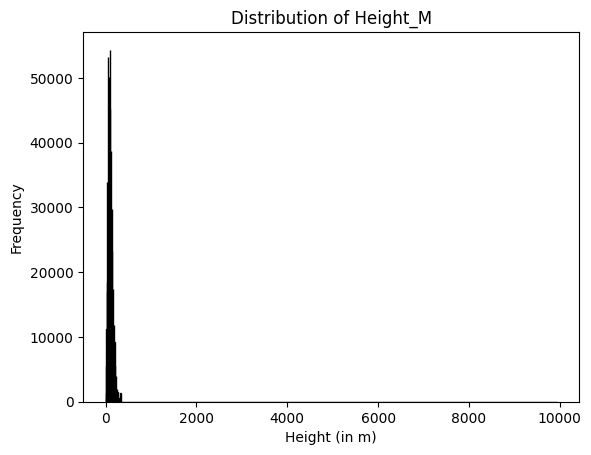

In [71]:
plt.hist(tree_dataset['height_M'], bins=2000, color='skyblue', edgecolor='black')
plt.xlabel('Height (in m)')
plt.ylabel('Frequency')
plt.title('Distribution of Height_M')
plt.show()

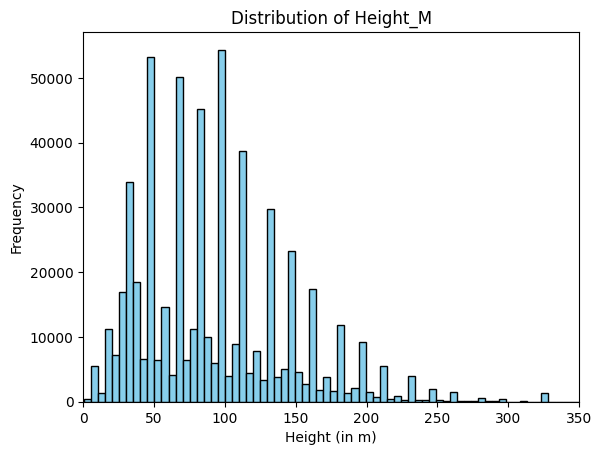

In [72]:
plt.hist(tree_dataset['height_M'], bins=2000, color='skyblue', edgecolor='black')
plt.xlabel('Height (in m)')
plt.ylabel('Frequency')
plt.title('Distribution of Height_M')
plt.xlim(0, 350)
plt.show()

In [73]:
print(len(tree_dataset.loc[tree_dataset['height_M'] >= 150]))
print(len(tree_dataset.loc[tree_dataset['height_M'] < 150]))
print(tree_dataset['height_M'].isnull().sum())

77458
492429
4677159


### Inspecting variables: *diameter_breast_height_CM*

In [74]:
tree_dataset['diameter_breast_height_CM'].isnull().sum()

2517731

In [75]:
tree_dataset['diameter_breast_height_CM'].sort_values(ascending=True).to_frame()

,diameter_breast_height_CM
4016161,-2.54
4021434,-2.54
4016294,-2.54
4024304,-2.54
1382160,0.00
...,...
5660232,NaN
5660233,NaN
5660234,NaN
5660235,NaN


In [76]:
print(tree_dataset['diameter_breast_height_CM'].max())
print(tree_dataset['diameter_breast_height_CM'].min())

25397.46
-2.54


In [77]:
tree_dataset['diameter_breast_height_CM'] = tree_dataset['diameter_breast_height_CM'].apply(lambda x: x if x > 0 else None)

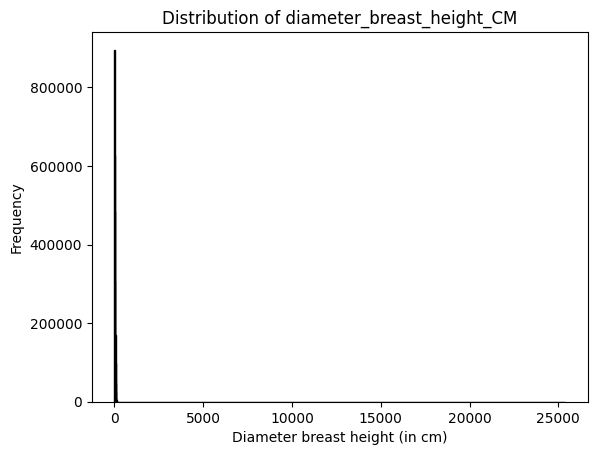

In [79]:
plt.hist(tree_dataset['diameter_breast_height_CM'], bins=2000, color='skyblue', edgecolor='black')
plt.xlabel('Diameter breast height (in cm)')
plt.ylabel('Frequency')
plt.title('Distribution of diameter_breast_height_CM')
plt.show()

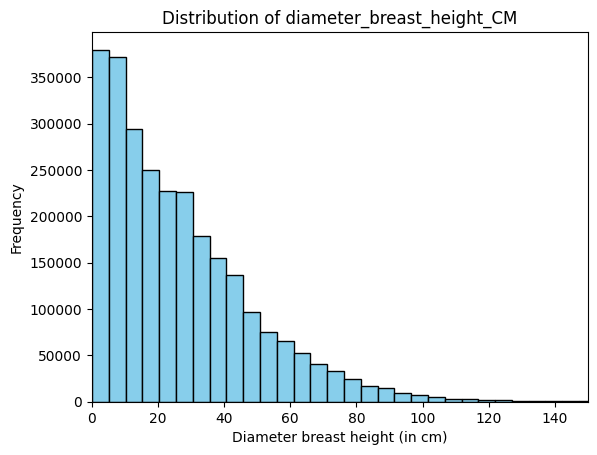

In [84]:
plt.hist(tree_dataset['diameter_breast_height_CM'], bins=5000, color='skyblue', edgecolor='black')
plt.xlabel('Diameter breast height (in cm)')
plt.ylabel('Frequency')
plt.title('Distribution of diameter_breast_height_CM')
plt.xlim(0, 150)
plt.show()

In [85]:
print(len(tree_dataset.loc[tree_dataset['diameter_breast_height_CM'] >= 150]))
print(len(tree_dataset.loc[tree_dataset['diameter_breast_height_CM'] < 150]))
print(tree_dataset['diameter_breast_height_CM'].isnull().sum())

2799
2674011
2570236


### Results at the end of the manipulations

In [87]:
print("Dataset sum of null values for each variable:\n")
print(tree_dataset.isnull().sum()) # final count of null values
print("\nDataset shape:", tree_dataset.shape) # final shape

Dataset sum of null values for each variable:

most_recent_observation             2005656
most_recent_observation_type        2969252
common_name                               0
scientific_name                       34583
city                                    472
state                                     0
longitude_coordinate                 662528
latitude_coordinate                  662397
address                             1213668
condition                           2660362
height_M                            4677159
native                                    0
diameter_breast_height_binned_CM    1223590
greater_metro                             0
city_ID                             1848965
location_type                             0
zipcode                             4387938
diameter_breast_height_CM           2570236
tree_species                          34583
dtype: int64

Dataset shape: (5247046, 19)


Note that the final dataset is composed by the following features:


*   **quantitative features**: *most_recent_observation, longitude_coordinate, latitude_coordinate, height_M, diameter_breast_height_binned_CM, city_ID, diameter_breast_height_CM,tree_species*;
*   **qualitative features**: *most_recent_observation_type, common_name, scientific_name, city, state, address, condition, native, greater_metro, location_type, zipcode*.

## Towards data visualisation

In [222]:
def create_csv(csv_name, header, labels, variables, header2 = []):

  '''
  csv_name = output filename
  header = first row with the name of the columns
  labels = first column
  variables = other columns
  header2 = optional secondary header
  '''

  with open(csv_name, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header) # write the header
    if header2 != []:
      writer.writerow(header2) # write the 2nd header

    for i in range(len(labels)):
      data = [labels[i]]
      for var in variables[i]:
        data.append(var)
      writer.writerow(data) # write each row of data

### Barchart for total

The following horizontal bar chart shows **the ten most frequent tree species in the dataset** according to their scientific names.

<Axes: >

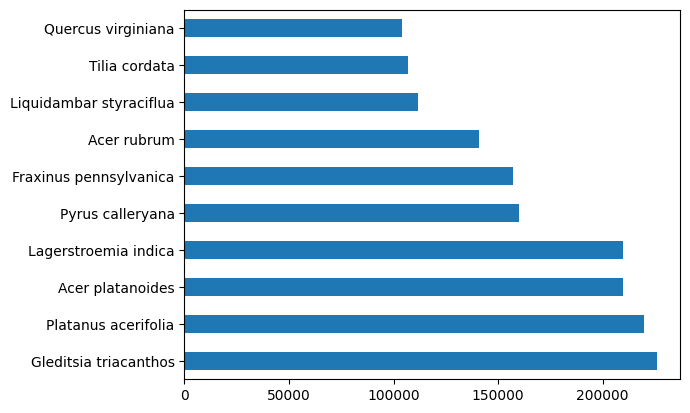

In [181]:
count_species = tree_dataset['scientific_name'].value_counts().sort_values(ascending=False).head(10) # excludes NA by default
count_species.plot(kind='barh')

In [182]:
# Scientific names and counts
scientific_names, tree_counts = list(count_species.index), list(count_species.values)

# Common names
common_names = []
for scientific_name in scientific_names:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Average height
height_values = []
for scientific_name in scientific_names:
  scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
  height_values.append(round(scientific_subset["height_M"].mean(), 2))

# Average diameter_breast_height_CM
diameter_values = []
for scientific_name in scientific_names:
  scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
  diameter_values.append(round(scientific_subset["diameter_breast_height_CM"].mean(), 2))

In [183]:
csv_name = "total.csv"
header = ['scientific_name','count','common_name','avg_height','avg_diameter']
labels = scientific_names
variables = np.column_stack((tree_counts, common_names, height_values, diameter_values))

create_csv(csv_name, header, labels, variables)

### Barchart for each city

In [110]:
# Create a dictionary
count_species_per_city = {}
unique_cities = tree_dataset['greater_metro'].unique()

# Iterate through each city and compute the top 10 scientific names
for city in unique_cities:
    city_data = tree_dataset[tree_dataset['greater_metro'] == city]
    count_species = city_data['scientific_name'].value_counts().reset_index()
    count_species.columns = ['scientific_name', 'count']
    count_species = count_species.sort_values(by='count', ascending=False).head(10)

    # Store the result in a dictionary where each key is a city name, and each value is a DataFrame
    count_species_per_city[city] = count_species

In [114]:
for city, dataframe in count_species_per_city.items():

  counts = list(dataframe.values[:, 1])
  common_names = []
  height_values = []
  diameter_values = []

  for scientific_name, count in list(dataframe.values):
    scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
    common_names.append(scientific_dict.get(scientific_name)[0]) # Common names
    height_values.append(round(scientific_subset["height_M"].mean(), 2)) # Average height
    diameter_values.append(round(scientific_subset["diameter_breast_height_CM"].mean(), 2)) # Average diameter_breast_height_CM

  csv_name = str(city) + '.csv'
  header = ['scientific_name','count','common_name','avg_height','avg_diameter']
  labels = list(dataframe.values[:, 0])
  variables = np.column_stack((counts, common_names, height_values, diameter_values))

  create_csv(csv_name, header, labels, variables)

### Stacked barchart for a specific state (California)

In [282]:
tree_dataset['state'].value_counts()

California              1811594
New York                 793051
Colorado                 357765
Texas                    268642
Oregon                   216751
Minnesota                176834
District of Columbia     175847
Washington               164919
Ohio                     151350
Wisconsin                128072
Florida                  128032
Maryland                 121290
Louisiana                105798
Indiana                   97227
Michigan                  92468
Missouri                  83535
South Dakota              61304
Kansas                    44767
Pennsylvania              42081
Georgia                   41176
Kentucky                  32711
Nevada                    32006
Rhode Island              24082
North Carolina            22587
Massachusetts             16736
Iowa                      15805
Hawaii                    15170
Tennessee                 10411
Oklahoma                   9729
New Mexico                 2502
Virginia                   1816
New Jers

In [283]:
california_trees = tree_dataset.loc[tree_dataset['state']=='California']
print(california_trees['city'].value_counts())
print("\n")
print(california_trees['scientific_name'].value_counts())

Los Angeles         582913
San Jose            264805
San Diego           212304
San Francisco       175272
Stockton             97707
Sacramento           87191
Rancho Cucamonga     80611
Anaheim              77020
Ontario              58577
Irvine               58364
Huntington Beach     55598
Oakland              35568
Garden Grove         17521
Fresno                6587
Santa Rosa            1556
Name: city, dtype: int64


Lagerstroemia indica       101276
Platanus acerifolia         96093
Liquidambar styraciflua     77900
Washingtonia robusta        75227
Magnolia grandiflora        68706
                            ...  
Pyrus domestica                 1
Beaucarnea stricta              1
Carya                           1
Lithocarpus edulis              1
Pinus elliottii                 1
Name: scientific_name, Length: 960, dtype: int64


In [284]:
top_species = list(california_trees['scientific_name'].value_counts().index[:5])

#### Order: alphabetic

In [333]:
cities_list = list(california_trees['city'].value_counts().sort_values(ascending=False).index[:])
cities_list.sort()
print(cities_list)

['Anaheim', 'Fresno', 'Garden Grove', 'Huntington Beach', 'Irvine', 'Los Angeles', 'Oakland', 'Ontario', 'Rancho Cucamonga', 'Sacramento', 'San Diego', 'San Francisco', 'San Jose', 'Santa Rosa', 'Stockton']


In [334]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

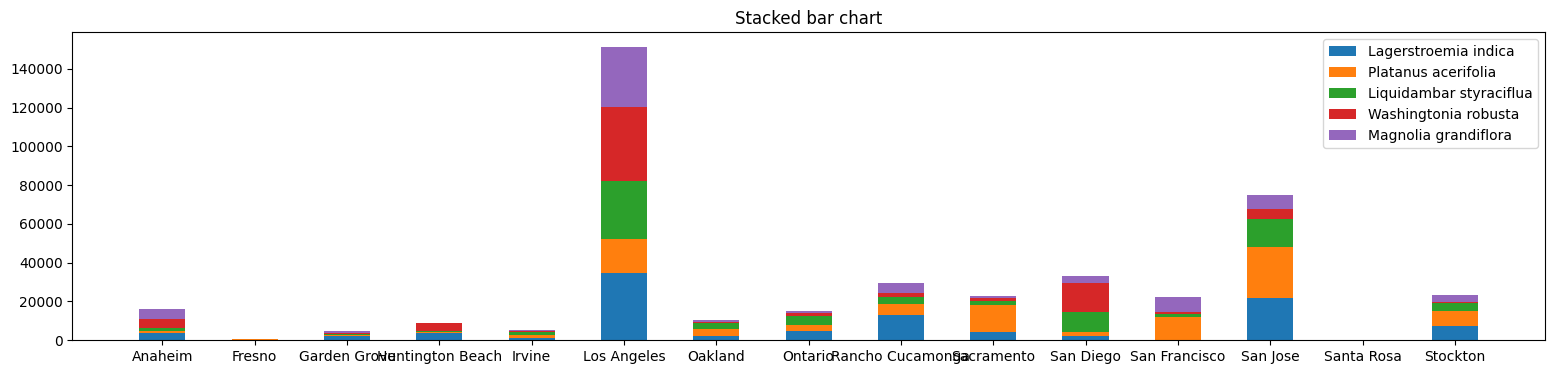

In [335]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [336]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']


In [337]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [338]:
csv_name = 'stacked_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [339]:
csv_name = 'stacked_2.csv'
create_csv(csv_name, header, labels, variables, header2)

##### Add the *Others* variable

In [340]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['city'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

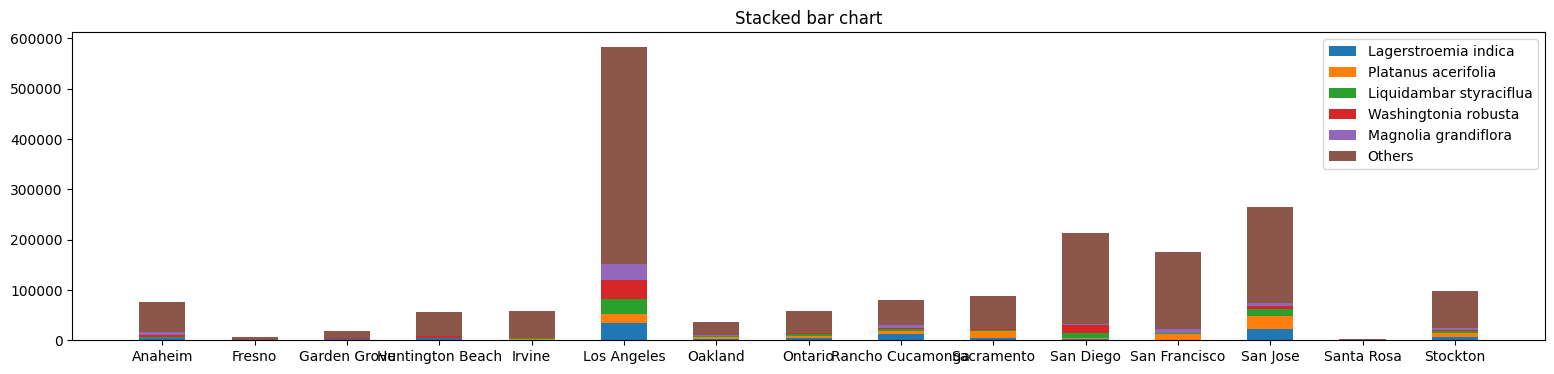

In [341]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [342]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Others')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Others']


In [343]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Others')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Others']


In [344]:
csv_name = 'stacked_others_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [345]:
csv_name = 'stacked_others_2.csv'
create_csv(csv_name, header, labels, variables, header2)

##### Add the *Total* variable

In [346]:
weight_counts = {}
tree_counts = []
top_species_total = top_species.copy()
top_species_total.append('Total')

for species in top_species_total:
  for idx, city in enumerate(cities_list):
    if species == 'Total':
      total_top_trees = sum(weight_counts.values())[idx]
      tree_counts.append(total_top_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

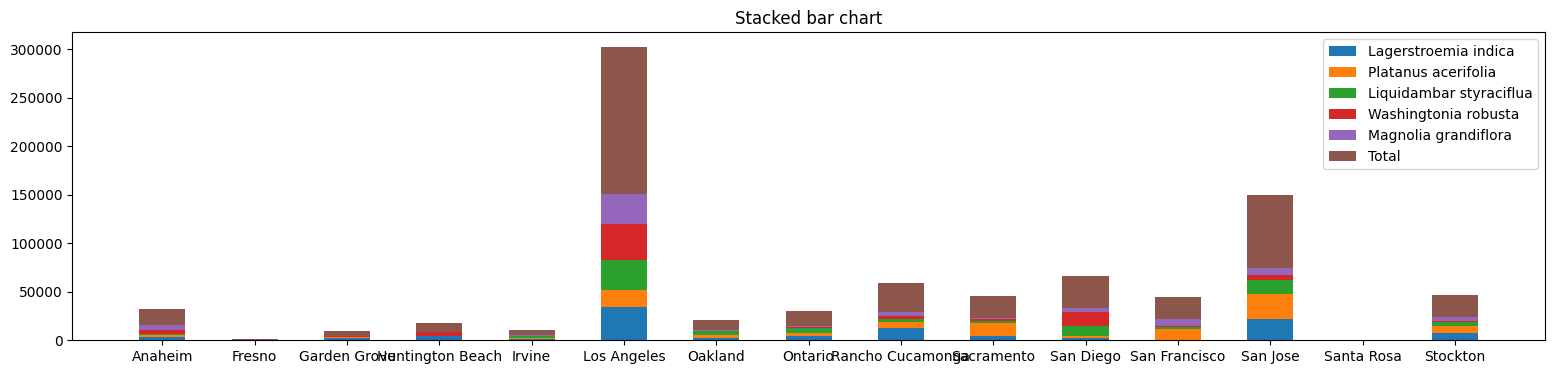

In [347]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [348]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Total')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Total']


In [349]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Total')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Total']


In [350]:
csv_name = 'stacked_total_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [351]:
csv_name = 'stacked_total_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Order: counts of all trees

In [352]:
cities_list = list(california_trees['city'].value_counts().sort_values(ascending=False).index[:])
print(cities_list)

['Los Angeles', 'San Jose', 'San Diego', 'San Francisco', 'Stockton', 'Sacramento', 'Rancho Cucamonga', 'Anaheim', 'Ontario', 'Irvine', 'Huntington Beach', 'Oakland', 'Garden Grove', 'Fresno', 'Santa Rosa']


In [353]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

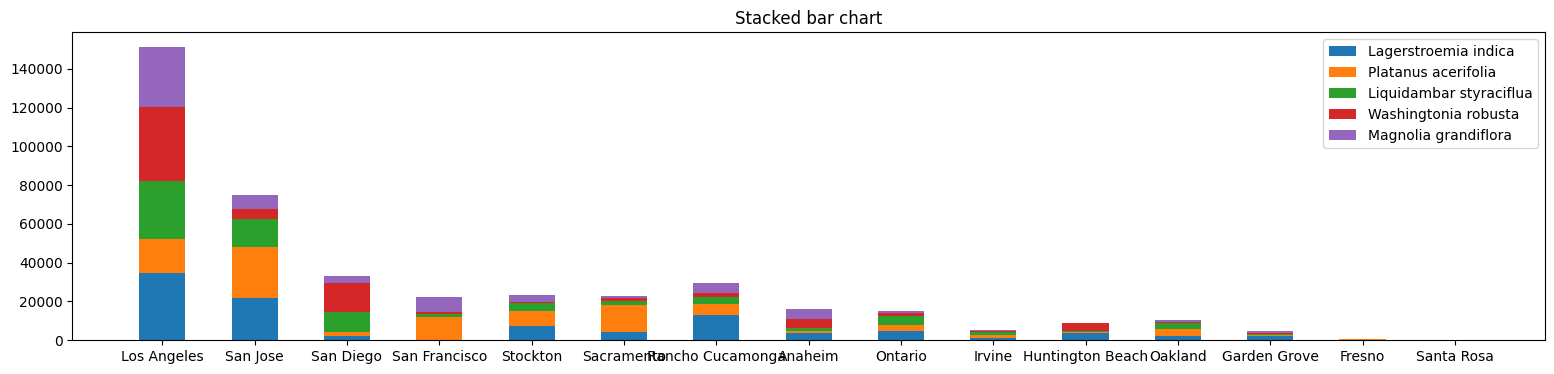

In [354]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [355]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']


In [356]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [357]:
csv_name = 'stacked_all_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [358]:
csv_name = 'stacked_all_2.csv'
create_csv(csv_name, header, labels, variables, header2)

##### Add the *Others* variable

In [359]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['city'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

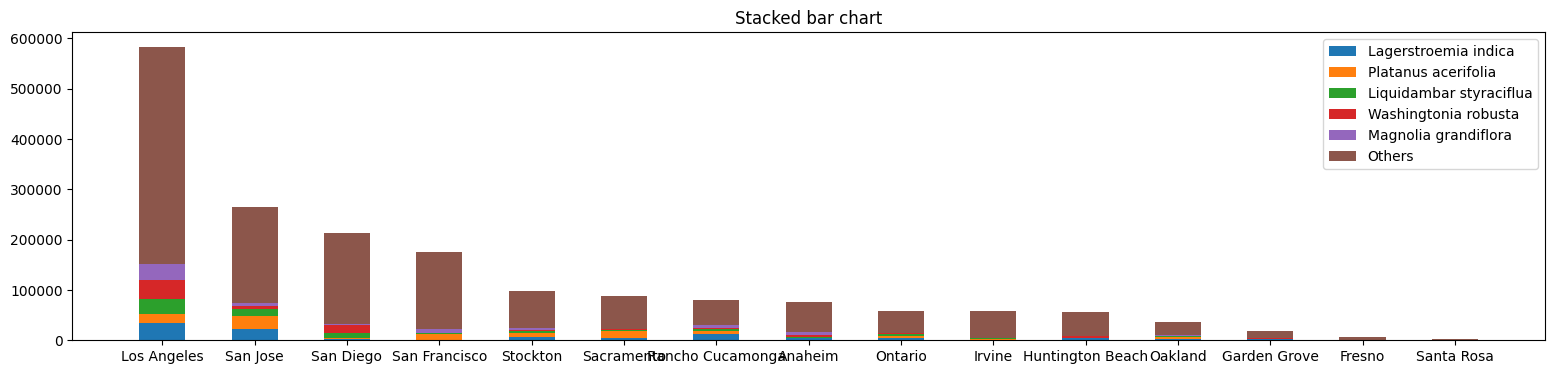

In [360]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [361]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Others')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Others']


In [362]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Others')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Others']


In [363]:
csv_name = 'stacked_all_others_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [364]:
csv_name = 'stacked_all_others_2.csv'
create_csv(csv_name, header, labels, variables, header2)

##### Add the *Total* variable

In [365]:
weight_counts = {}
tree_counts = []
top_species_total = top_species.copy()
top_species_total.append('Total')

for species in top_species_total:
  for idx, city in enumerate(cities_list):
    if species == 'Total':
      total_top_trees = sum(weight_counts.values())[idx]
      tree_counts.append(total_top_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

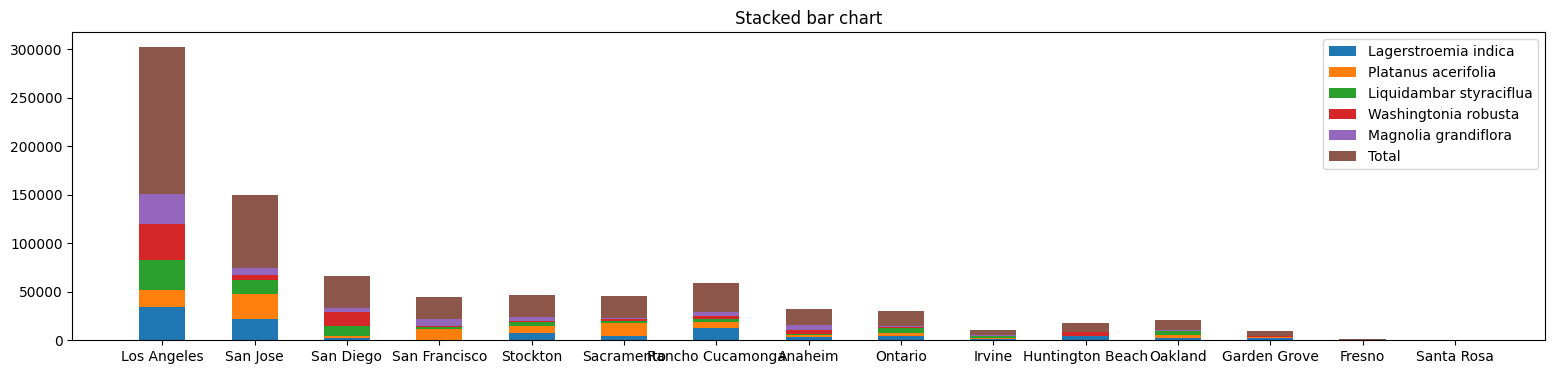

In [366]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [367]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Total')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Total']


In [368]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Total')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Total']


In [369]:
csv_name = 'stacked_all_total_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [370]:
csv_name = 'stacked_all_total_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Order: counts of top 5 trees

In [371]:
top_california_trees = california_trees.loc[california_trees['scientific_name'].isin(top_species)]
cities_list = list(top_california_trees['city'].value_counts().sort_values(ascending=False).index[:])
print(cities_list)

['Los Angeles', 'San Jose', 'San Diego', 'Rancho Cucamonga', 'Stockton', 'Sacramento', 'San Francisco', 'Anaheim', 'Ontario', 'Oakland', 'Huntington Beach', 'Irvine', 'Garden Grove', 'Fresno', 'Santa Rosa']


In [372]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

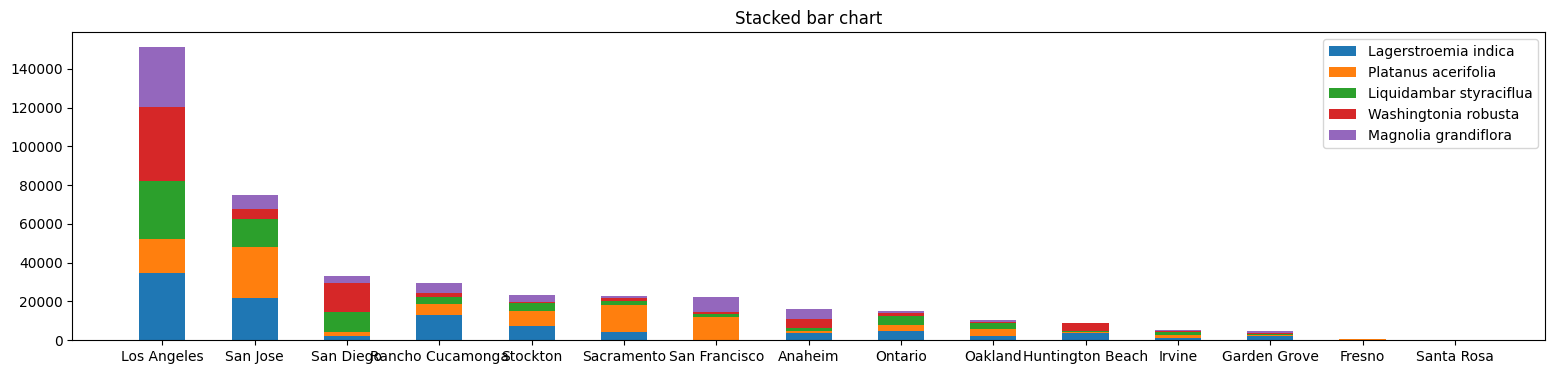

In [373]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [374]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']


In [375]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [376]:
csv_name = 'stacked_top_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [377]:
csv_name = 'stacked_top_2.csv'
create_csv(csv_name, header, labels, variables, header2)

##### Add the *Others* variable

In [378]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['city'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

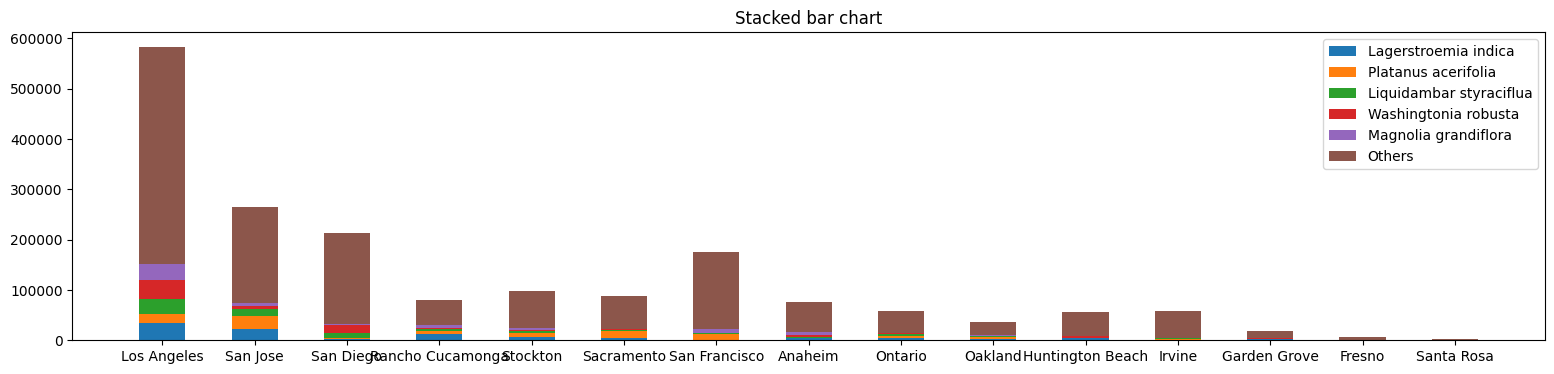

In [379]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [380]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Others')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Others']


In [381]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Others')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Others']


In [382]:
csv_name = 'stacked_top_others_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [383]:
csv_name = 'stacked_top_others_2.csv'
create_csv(csv_name, header, labels, variables, header2)

##### Add the *Total* variable

In [384]:
weight_counts = {}
tree_counts = []
top_species_total = top_species.copy()
top_species_total.append('Total')

for species in top_species_total:
  for idx, city in enumerate(cities_list):
    if species == 'Total':
      total_top_trees = sum(weight_counts.values())[idx]
      tree_counts.append(total_top_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

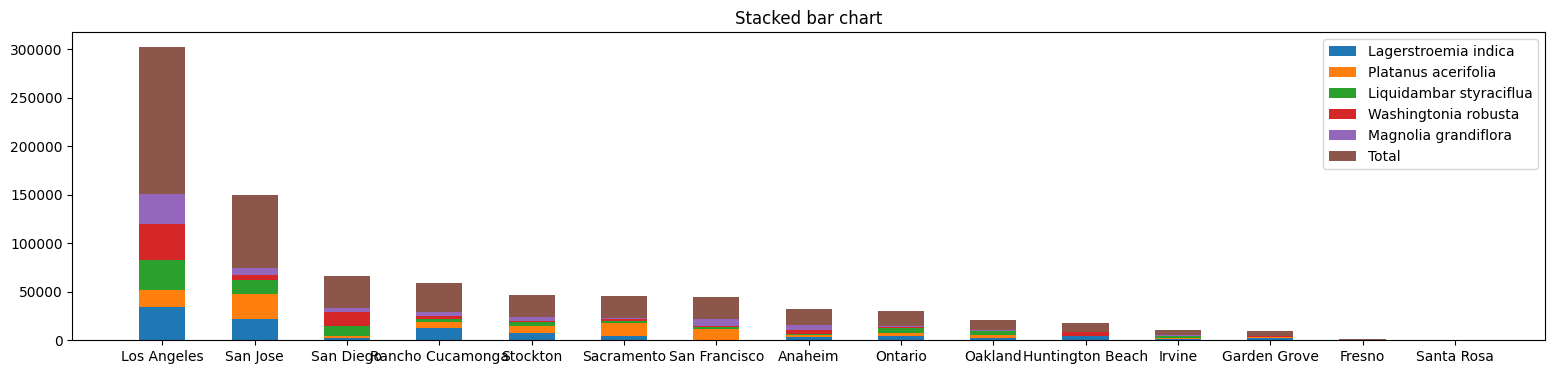

In [385]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [386]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Total')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Total']


In [387]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Total')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Total']


In [388]:
csv_name = 'stacked_top_total_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [389]:
csv_name = 'stacked_top_total_2.csv'
create_csv(csv_name, header, labels, variables, header2)

### Small multiples for a specific state (California)

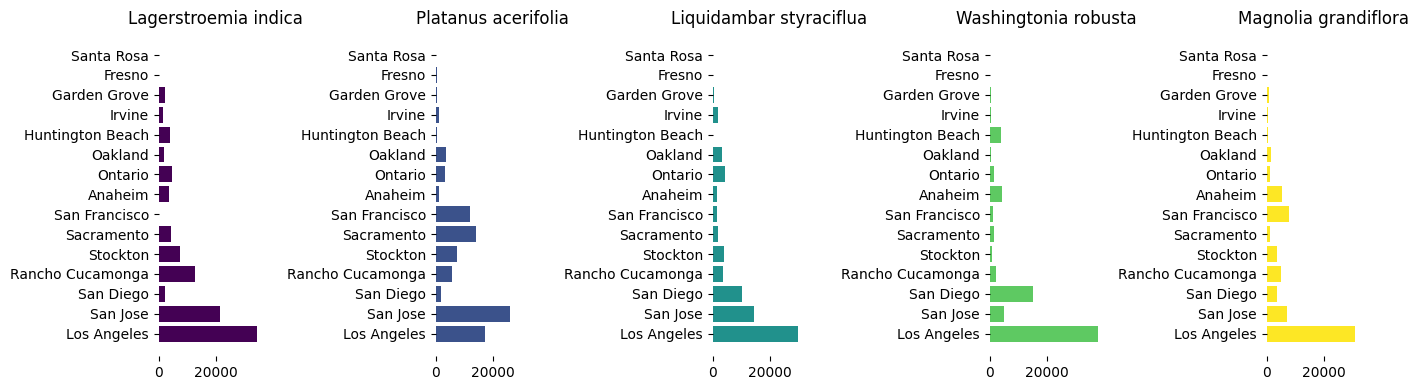

In [267]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4), sharex=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = california_trees.loc[california_trees['scientific_name'] == species]

    for j, city in enumerate(cities_list):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()